In [14]:
import numpy as np
import random
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *
import networkx as nx
from utils import *
import time
import csv

In [15]:
# constants
c = 2e5 # speed of light in fiber [km/s]
p_link = 1.0 # photon insertion loss incorporates various efficiencies of the experimental hardware
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)


In [16]:
Le2e = 200
τ_cut_list = np.logspace(0,2,41)*Le2e/(2*c) # cutoff [sec]
τ_cut_list = [0.0005, 0.0006294627058970836, 0.0007924465962305568, 0.00099763115748444, 0.00125594321575479,
              0.00158113883008419, 0.0019905358527674867, 0.002505936168136362, 0.003154786722400967,
              0.003971641173621408, 0.005, 0.0062946270589708374, 0.00792446596230557,
              0.0099763115748444, 0.012559432157547906, 0.015811388300841896, 
              0.019905358527674867, 0.025059361681363624, 0.031547867224009665, 
              0.03971641173621408, 0.05]#0.06294627058970838, 0.07924465962305571, 0.09976311574844403, 0.12559432157547912, 0.15811388300841897, 0.19905358527674868, 0.25059361681363623, 0.31547867224009685, 0.39716411736214113, 0.5, 0.6294627058970838, 0.792446596230557, 0.9976311574844405, 1.255943215754791, 1.5811388300841898, 1.9905358527674866, 2.5059361681363628, 3.1547867224009685, 3.971641173621411, 5.0
τ_cut_list = [0.0019905358527674867,0.02,0.03,0.04,0.05,0.06294627058970838, 0.07924465962305571, 0.09976311574844403]
τ_cut_list = np.array(τ_cut_list)
τ_coh = 0.01
seq_ebit = np.zeros(len(τ_cut_list))
seq_skr = np.zeros(len(τ_cut_list))
seq_e2e_F = np.zeros(len(τ_cut_list))
par_ebit = np.zeros(len(τ_cut_list))
par_skr = np.zeros(len(τ_cut_list))
par_e2e_F = np.zeros(len(τ_cut_list))

seq_ebit_no_cutoff = np.zeros(len(τ_cut_list))
seq_skr_no_cutoff = np.zeros(len(τ_cut_list))
seq_e2e_F_no_cutoff = np.zeros(len(τ_cut_list))
par_ebit_no_cutoff = np.zeros(len(τ_cut_list))
par_skr_no_cutoff = np.zeros(len(τ_cut_list))
par_e2e_F_no_cutoff = np.zeros(len(τ_cut_list))

n= 4
links = np.array([Le2e/n]*n)
for cut_i,τ_cut in enumerate(τ_cut_list):
    seq_ebit[cut_i],seq_skr[cut_i],seq_e2e_F[cut_i] = T_sequential_cutoff(τ_cut, τ_coh, mu_link, F_link,links)
    par_ebit[cut_i],par_skr[cut_i],par_e2e_F[cut_i] = T_parallel_cutoff(τ_cut, τ_coh, mu_link, F_link,links, cct= True, Nmax=100000)
    seq_ebit_no_cutoff[cut_i],seq_skr_no_cutoff[cut_i],seq_e2e_F_no_cutoff[cut_i] = T_sequential_no_cutoff(τ_coh, mu_link, F_link,links)
    par_ebit_no_cutoff[cut_i],par_skr_no_cutoff[cut_i],par_e2e_F_no_cutoff[cut_i] = T_parallel_no_cutoff(τ_coh, mu_link, F_link,links, cct= True, Nmax=100000)


0.0019905358527674867 0.01 1 0.8357060858543488 0.0 0.1642939141456512
0.02 0.01 1 0.6480601379647045 0.0 0.3519398620352955
0.03 0.01 1 0.6436742466560961 0.0 0.35632575334390393
0.04 0.01 1 0.6429740572074123 0.0 0.3570259427925877
0.05 0.01 1 0.642680774793206 0.0 0.35731922520679404
0.06294627058970838 0.01 1 0.6427988201072588 0.0 0.35720117989274125
0.07924465962305571 0.01 1 0.6429544864199732 0.0 0.3570455135800268
0.09976311574844403 0.01 1 0.6429615547227558 0.0 0.35703844527724415


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


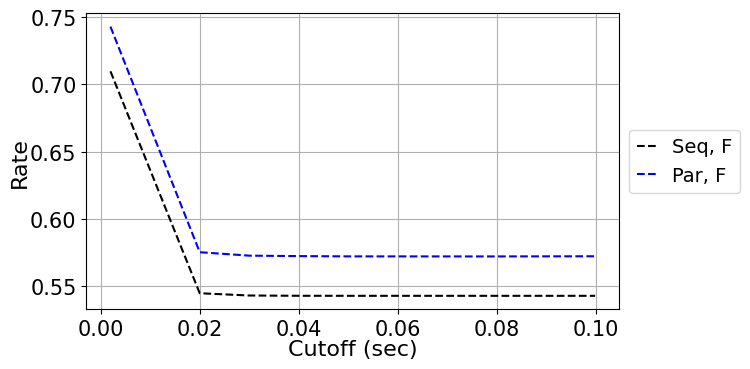

In [17]:
font_size = 44
image_width = 7.6
image_lenght = 3.8
legend_flag  =True
legends_on_the_right_flag = True
legend_font_size = 14
fig = plt.figure()

    
fig.set_size_inches(image_width, image_lenght, forward=True) 

label_size = 40
csfont = {'fontname':'Times New Roman'}
plt.rcParams['xtick.labelsize'] = 15 
plt.rcParams['ytick.labelsize']= 15
plt.xlabel("Cutoff (sec)", fontsize=16,labelpad=0)
plt.ylabel("Rate",fontsize=16,labelpad=0)
plt.grid(True)
plt.tight_layout()



legend_labels = [
                # "Seq, ebit rate","Seq, SKR","Par, ebit rate","Par, SKR",
                # "Seq (no cutoff), ebit rate","Seq (no cutoff), SKR",
                #  "Par (no cutoff), ebit rate","Par (no cutoff), SKR",
    
                "Seq, F","Par, F",
                ]

# plt.plot(τ_cut_list,seq_ebit,"-",color=f"C{0}")
# plt.plot(τ_cut_list,seq_skr,linestyle='dashed',color=f"C{0}")
# plt.plot(τ_cut_list,par_ebit,"-",color=f"C{1}")
# plt.plot(τ_cut_list,par_skr,linestyle='dashed',color=f"C{1}")

# plt.plot(τ_cut_list,seq_ebit_no_cutoff,"-",color=f"C{2}")
# plt.plot(τ_cut_list,seq_skr_no_cutoff,linestyle='dashed',color=f"C{2}")
# plt.plot(τ_cut_list,par_ebit_no_cutoff,"-",color=f"C{3}")
# plt.plot(τ_cut_list,par_skr_no_cutoff,linestyle='dashed',color=f"C{3}")

plt.plot(τ_cut_list,seq_e2e_F,linestyle='dashed',color="black")
plt.plot(τ_cut_list,par_e2e_F,linestyle='dashed',color="blue")
# plt.yscale('log')
plt.legend()
ax = plt.subplot(111)
# plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
# plt.minorticks_on()
if legend_flag:
    plt.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size, ncol=1,handleheight=2.4, labelspacing=0.02)
if legends_on_the_right_flag:
    ax = plt.subplot(111)
    ax.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size,loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../plotting/plots/figure0.pdf")

In [18]:
sim_seq_ebit = np.zeros(len(τ_cut_list))
sim_seq_skr = np.zeros(len(τ_cut_list))
sim_seq_F = np.zeros(len(τ_cut_list))
sim_par_ebit = np.zeros(len(τ_cut_list))
sim_par_skr = np.zeros(len(τ_cut_list))
sim_par_F = np.zeros(len(τ_cut_list))

n= 4
links = np.array([Le2e/n]*n)

each_L_explored_cutoffs = {}
each_L_explored_cohs = {}
cutoff_values  =set([])
each_scheme_cutoff_values = {}
each_coherence_time_cutoffs = {}
files = [

    # "../results/equal_distance_repeater_placement_cutoff_Le2e200km_time_step_5.csv",
        # "../results/equal_distance_repeater_placement_cutoff_Le2e200km_time_step_5_testing.csv",

    
        # "../results/equal_distance_repeater_placement_cutoff_Le2e200km_time_step_5_testingv2.csv",
        # "../results/equal_distance_repeater_placement_cutoff_Le2e200km_time_step_5_testingv3.csv",
        # "../results/equal_distance_repeater_placement_cutoff_Le2e200km_time_step_5_testingv6.csv",
        "../results/equal_distance_repeater_placement_cutoff_Le2e200km_time_step_5_testingv7.csv",


    

]
cutoff_values = set([])
for file in files:
    with open(file, "r") as f:
        reader = csv.reader( (line.replace('\0','') for line in f) )
        for line in reader:
            scheme = line[0]
            exp_class_com = line[1]
            having_cut_off = line[2]
            R = int(line[3])
            length =float(line[4])
            L = (float(line[14]))
            cut_off = float(line[4])/1000
            e2e_rate = float(line[7])
            gen_delay = line[10]
            # '[13.96899264]'
            skr = line[11].replace("[","")
            skr = skr.replace("]","")
            skr = float(skr)
            avg_F = float(line[26])
            R = int(line[3])
            coherence_time = float(line[27])
            # NS = line[31]
            # T_succ = float(line[32])/1000000
            # print()
            if  ( R in [3] and having_cut_off in ["True"]  and 
                 exp_class_com in ["True"]):

                if scheme =="parallel":
                    scheme_raw ="Sim, Par, ebit rate"
                    scheme_SKR ="Sim, Par, SKR"
                    scheme_T_succ ="Sim, Par, T_succ"
                    scheme_F ="Sim, Par, F"
                elif scheme =="sequential":
                    scheme_raw = "Sim, Seq, ebit rate"
                    scheme_SKR = "Sim, Seq, SKR"
                    scheme_F = "Sim, Seq, F"
                ex,ez = line[16],line[17]
                mu_e2e = line[28]
                skr_F = line[13]
                print(cut_off/1000, coherence_time/1000000,mu_e2e,skr_F,ex,ez)
                try:
                    each_scheme_cutoff_values[scheme_raw][cut_off/1000].append(e2e_rate)
                except:
                    try:
                        each_scheme_cutoff_values[scheme_raw][cut_off/1000]=[e2e_rate]
                    except:
                        each_scheme_cutoff_values[scheme_raw]={}
                        each_scheme_cutoff_values[scheme_raw][cut_off/1000]=[e2e_rate]
    
                try:
                    each_scheme_cutoff_values[scheme_SKR][cut_off/1000].append(skr)
                except:
                    try:
                        each_scheme_cutoff_values[scheme_SKR][cut_off/1000]=[skr]
                    except:
                        each_scheme_cutoff_values[scheme_SKR]={}
                        each_scheme_cutoff_values[scheme_SKR][cut_off/1000]=[skr]

                try:
                    each_scheme_cutoff_values[scheme_F][cut_off/1000].append(avg_F)
                except:
                    try:
                        each_scheme_cutoff_values[scheme_F][cut_off/1000]=[avg_F]
                    except:
                        each_scheme_cutoff_values[scheme_F]={}
                        each_scheme_cutoff_values[scheme_F][cut_off/1000]=[avg_F]

                #cutoff_values.add(cut_off/1000)
                # try:
                #     each_scheme_cutoff_values[scheme_T_succ][cut_off/1000].append(T_succ)
                # except:
                #     try:
                #         each_scheme_cutoff_values[scheme_T_succ][cut_off/1000]=[T_succ]
                #     except:
                #         each_scheme_cutoff_values[scheme_T_succ]={}
                #         each_scheme_cutoff_values[scheme_T_succ][cut_off/1000]=[T_succ]
            

for cut_i,τ_cut in enumerate(τ_cut_list):
    for scheme,cutoff_values in each_scheme_cutoff_values.items(): 
        for cutoff,values in cutoff_values.items():
            if cutoff==τ_cut:
                avg_value = sum(values)/len(values)
                if "Sim, Seq, SKR" == scheme:
                    sim_seq_skr[cut_i]= avg_value
                elif "Sim, Seq, ebit rate"==scheme:
                    sim_seq_ebit[cut_i]= avg_value
                elif "Sim, Par, ebit rate" ==scheme:
                    sim_par_ebit[cut_i]= avg_value
                elif scheme =="Sim, Par, SKR":
                    sim_par_skr[cut_i]= avg_value
                elif scheme=="Sim, Par, F":
                    sim_par_F[cut_i]= avg_value
                elif scheme=="Sim, Seq, F":
                    sim_seq_F[cut_i]= avg_value
        

0.0019905358527674867 1e-05 1 0.8336123981726579 0.0 0.16638760182734214
0.02 1e-05 1 0.6434413654220024 0.0 0.35655863457799764
0.0019905358527674867 1e-08 1.0 0.8156206826839739 0.18437931731602608 0.0
0.03 1e-05 1 0.6447168589559026 0.0 0.3552831410440974
0.04 1e-05 1 0.6421185335042666 0.0 0.3578814664957334
0.05 1e-05 1 0.6404637375136979 0.0 0.3595362624863021
0.02 1e-08 1.0 0.6352725659760813 0.3647274340239187 0.0
0.04 1e-08 1.0 0.6281589105664779 0.3718410894335221 0.0
0.06294627058970838 1e-05 1 0.6430994780939847 0.0 0.3569005219060153
0.07924465962305571 1e-05 1 0.6410926747274338 0.0 0.3589073252725662
0.03 1e-08 1.0 0.6357612258032728 0.36423877419672723 0.0
0.09976311574844403 1e-05 1 0.6401517427374698 0.0 0.3598482572625302
0.05 1e-08 1.0 0.6297779847101832 0.3702220152898168 0.0
0.0019905358527674867 1e-05 1 0.83512577058646 0.0 0.16487422941354002
0.02 1e-05 1 0.6462142035900945 0.0 0.3537857964099055
0.04 1e-08 1.0 0.629249895789706 0.370750104210294 0.0
0.062946270

In [ ]:
τ_coh_list = np.linspace(0.01,0.01,1)
print(τ_coh_list)

In [ ]:
τ_cut, τ_coh,mu_e2e,f_e2e_qkd,ex,ez
0.0019905358527674867 0.01 1 0.8359647523978859 0.0 0.16403524760211408
0.02 0.01 1 0.6476288258488309 0.0 0.35237117415116914
0.03 0.01 1 0.6431598043763842 0.0 0.3568401956236158
0.04 0.01 1 0.6424337962815778 0.0 0.3575662037184222
0.05 0.01 1 0.6427734104881112 0.0 0.3572265895118888

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


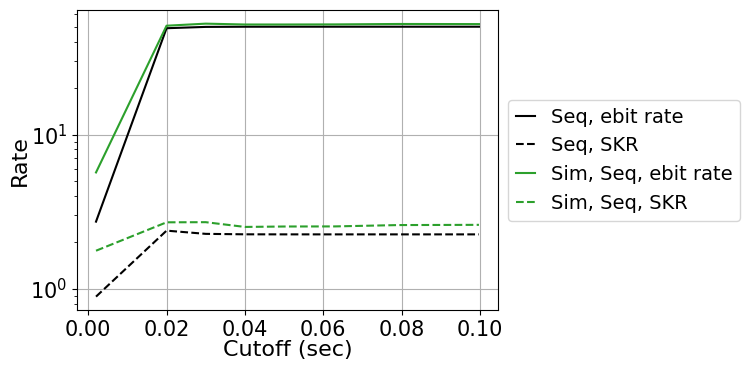

In [19]:
font_size = 44
image_width = 7.6
image_lenght = 3.8
legend_flag  =True
legends_on_the_right_flag = True
legend_font_size = 14
fig = plt.figure()

    
fig.set_size_inches(image_width, image_lenght, forward=True) 

label_size = 40
csfont = {'fontname':'Times New Roman'}
plt.rcParams['xtick.labelsize'] = 15 
plt.rcParams['ytick.labelsize']= 15
plt.xlabel("Cutoff (sec)", fontsize=16,labelpad=0)
plt.ylabel("Rate",fontsize=16,labelpad=0)
plt.grid(True)
plt.tight_layout()



legend_labels = [
                "Seq, ebit rate",
                "Seq, SKR",
                 # "Par, ebit rate",
                # "Par, SKR",
                 # "Par, F",
                 "Sim, Seq, ebit rate",
                "Sim, Seq, SKR",
                 # "Sim, Par, ebit rate",
                # "Sim, Par, SKR",
                # "Seq (no cutoff), ebit rate",
                # "Par (no cutoff), ebit rate",
    
# "Seq, F","Par, F",
# "Sim, Seq, F",
    # "Sim, Par, F",
    
    ]

plt.plot(τ_cut_list,seq_ebit,"-",color="black")
plt.plot(τ_cut_list,seq_skr,linestyle='dashed',color="black")
# plt.plot(τ_cut_list,par_ebit,"-",color="red")
# plt.plot(τ_cut_list,par_skr,linestyle='dashed',color="red")
plt.plot(τ_cut_list,sim_seq_ebit,"-",color=f"C{2}")
plt.plot(τ_cut_list,sim_seq_skr,linestyle='dashed',color=f"C{2}")
# plt.plot(τ_cut_list,sim_par_ebit,"-",color="blue")
# plt.plot(τ_cut_list,sim_par_skr,linestyle='dashed',color="blue")

# plt.plot(τ_cut_list,seq_ebit_no_cutoff,"-",color=f"C{4}")
# plt.plot(τ_cut_list,seq_skr_no_cutoff,linestyle='dashed',color=f"C{4}")
# plt.plot(τ_cut_list,par_ebit_no_cutoff,"-",color="red")
# plt.plot(τ_cut_list,par_skr_no_cutoff,linestyle='dashed',color=f"C{5}")



# plt.plot(τ_cut_list,seq_e2e_F,linestyle='dashed',color="black")
# plt.plot(τ_cut_list,par_e2e_F,linestyle='dashed',color="blue")

# plt.plot(τ_cut_list,sim_seq_e2e_F,linestyle='dashed',color="red")
# plt.plot(τ_cut_list,sim_par_F,linestyle='dashed',color="brown")

plt.yscale('log')
plt.legend()
ax = plt.subplot(111)
# plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
# plt.minorticks_on()
if legend_flag:
    plt.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size, ncol=1,handleheight=2.4, labelspacing=0.02)
if legends_on_the_right_flag:
    ax = plt.subplot(111)
    ax.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size,loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../plotting/plots/figure0.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


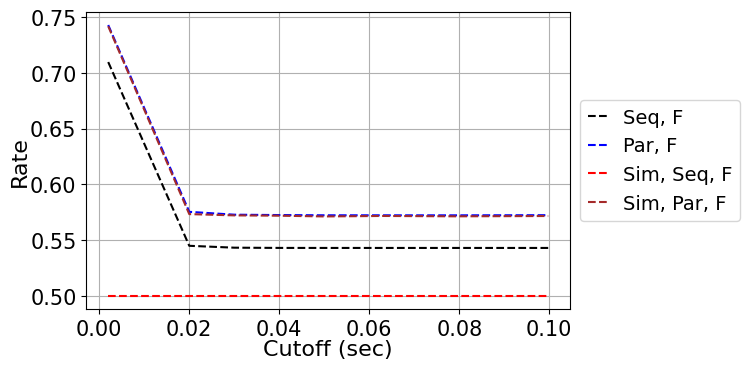

In [20]:
font_size = 44
image_width = 7.6
image_lenght = 3.8
legend_flag  =True
legends_on_the_right_flag = True
legend_font_size = 14
fig = plt.figure()

    
fig.set_size_inches(image_width, image_lenght, forward=True) 

label_size = 40
csfont = {'fontname':'Times New Roman'}
plt.rcParams['xtick.labelsize'] = 15 
plt.rcParams['ytick.labelsize']= 15
plt.xlabel("Cutoff (sec)", fontsize=16,labelpad=0)
plt.ylabel("Rate",fontsize=16,labelpad=0)
plt.grid(True)
plt.tight_layout()



legend_labels = [
                # "Seq, ebit rate",
                # "Seq, SKR",
                 # "Par, ebit rate",
                # "Par, SKR",
                 # "Par, F",
                 # "Sim, Seq, ebit rate",
                # "Sim, Seq, SKR",
                 # "Sim, Par, ebit rate",
                # "Sim, Par, SKR",
                # "Seq (no cutoff), ebit rate",
                # "Par (no cutoff), ebit rate",
    
"Seq, F","Par, F",
"Sim, Seq, F",
    "Sim, Par, F",
    
    ]

# plt.plot(τ_cut_list,seq_ebit,"-",color="black")
# plt.plot(τ_cut_list,seq_skr,linestyle='dashed',color="black")
# plt.plot(τ_cut_list,par_ebit,"-",color="black")
# plt.plot(τ_cut_list,par_skr,linestyle='dashed',color="red")
# plt.plot(τ_cut_list,sim_seq_ebit,"-",color=f"C{2}")
# plt.plot(τ_cut_list,sim_seq_skr,linestyle='dashed',color=f"C{2}")
# plt.plot(τ_cut_list,sim_par_ebit,"-",color="blue")
# plt.plot(τ_cut_list,sim_par_skr,linestyle='dashed',color="blue")

# plt.plot(τ_cut_list,seq_ebit_no_cutoff,"-",color=f"C{4}")
# plt.plot(τ_cut_list,seq_skr_no_cutoff,linestyle='dashed',color=f"C{4}")
# plt.plot(τ_cut_list,par_ebit_no_cutoff,"-",color="red")
# plt.plot(τ_cut_list,par_skr_no_cutoff,linestyle='dashed',color=f"C{5}")



plt.plot(τ_cut_list,seq_e2e_F,linestyle='dashed',color="black")
plt.plot(τ_cut_list,par_e2e_F,linestyle='dashed',color="blue")

plt.plot(τ_cut_list,sim_seq_F,linestyle='dashed',color="red")
plt.plot(τ_cut_list,sim_par_F,linestyle='dashed',color="brown")

# plt.yscale('log')
plt.legend()
ax = plt.subplot(111)
# plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
# plt.minorticks_on()
if legend_flag:
    plt.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size, ncol=1,handleheight=2.4, labelspacing=0.02)
if legends_on_the_right_flag:
    ax = plt.subplot(111)
    ax.legend([label for label in legend_labels ],handlelength=1.0,fontsize=legend_font_size,loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../plotting/plots/figure0F.pdf")